# Analysis of Tesla Stock vs Ford and GM

### Analyze performance of Tesla Stocks, compared to GM and Ford

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader
import pandas_datareader.data as data
import datetime

# Look at a 5 year window
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019, 9, 1)

tesla = data.DataReader('TSLA', 'yahoo', start, end)
ford = data.DataReader('F', 'yahoo', start, end)
gm = data.DataReader('GM', 'yahoo', start, end)

tesla.head()
ford.head()
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,41.060001,40.340000,40.680000,40.950001,14763300.0,32.049309
2014-01-03,40.950001,39.000000,40.919998,39.570000,41426900.0,30.969248
2014-01-06,40.590000,39.639999,39.900002,40.400002,25063500.0,31.618843
2014-01-07,40.939999,40.099998,40.700001,40.200001,14156900.0,31.462315
2014-01-08,40.840000,40.200001,40.330002,40.419998,11342400.0,31.634497


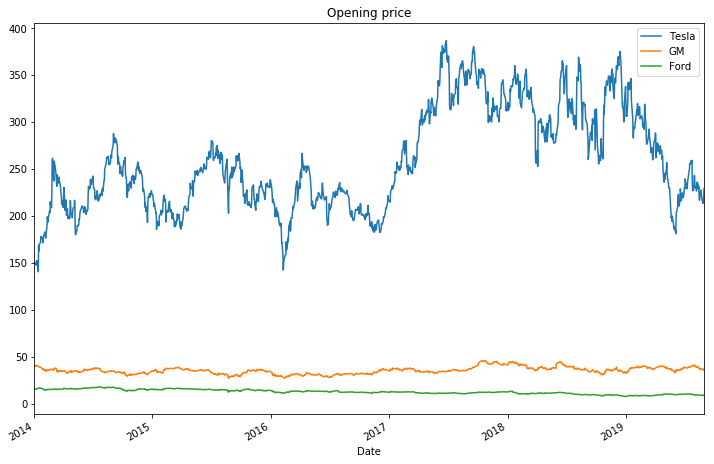

In [10]:
# Look at the opening price:
#
# - The opening price is the price at which a security first trades when an exchange opens for the day.
# - An opening price is not identical to the previous day's closing price.
# - There are several day-trading strategies based on the opening price of a market or security.
#

import matplotlib.pyplot as plt
%matplotlib inline

tesla['Open'].plot(label='Tesla', figsize=(12, 8), title='Opening price')
gm['Open'].plot(label='GM', figsize=(12, 8), title='Opening price')
ford['Open'].plot(label='Ford', figsize=(12, 8), title='Opening price')

plt.legend();

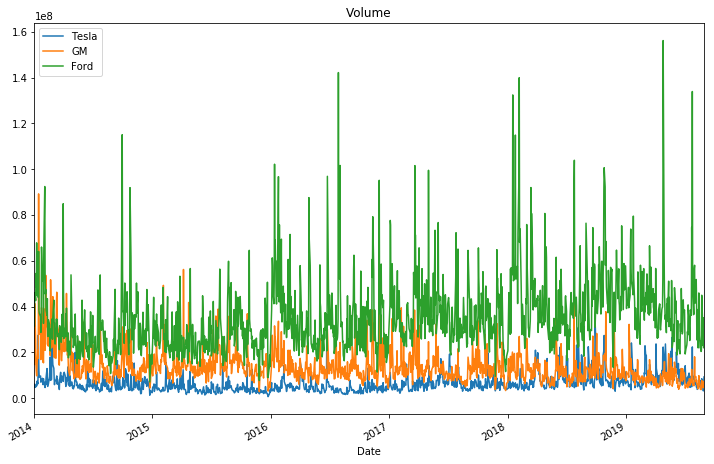

In [12]:
# How many shares were traded each day. A high daily volume is common when stock-specific news items are released
# or when the market moves significantly, while a low daily volume can occur on light-news days and calm days
# for the stock market.

tesla['Volume'].plot(label='Tesla', figsize=(12, 8), title='Volume')
gm['Volume'].plot(label='GM', figsize=(12, 8), title='Volume')
ford['Volume'].plot(label='Ford', figsize=(12, 8), title='Volume')

plt.legend();

In [47]:
print("Ford: ", (ford['Volume'].idxmax()))
print("GM:   ", gm['Volume'].idxmax())
print("Tesla:", tesla['Volume'].idxmax())

Ford:  2019-04-26 00:00:00
GM:    2014-01-15 00:00:00
Tesla: 2018-09-28 00:00:00


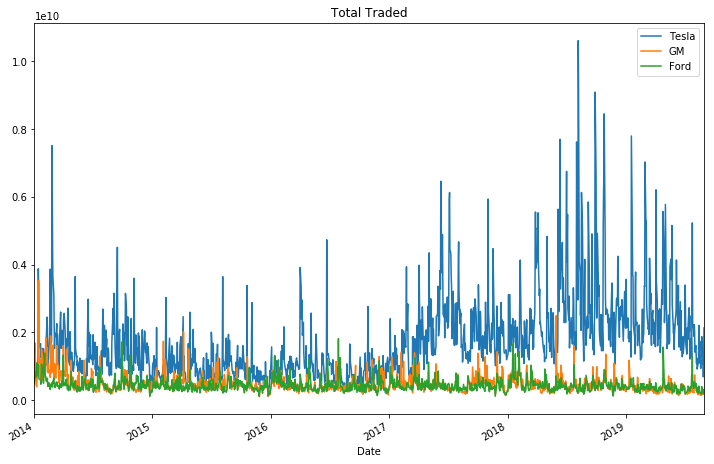

In [48]:
tesla['Total Traded'] = tesla['Open'] * tesla['Volume']
ford['Total Traded'] = ford['Open'] * ford['Volume']
gm['Total Traded'] = gm['Open'] * gm['Volume']

tesla['Total Traded'].plot(label='Tesla', figsize=(12, 8), title='Total Traded')
gm['Total Traded'].plot(label='GM', figsize=(12, 8), title='Total Traded')
ford['Total Traded'].plot(label='Ford', figsize=(12, 8), title='Total Traded')

plt.legend();

In [50]:
print(tesla['Total Traded'].idxmax())

2018-08-07 00:00:00


In [51]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,Cum Ret
Date,,,,,,,,,
2014-01-02,152.479996,146.550003,149.800003,150.100006,6188400,150.100006,9.270223e+08,NaN,NaN
2014-01-03,152.190002,148.600006,150.000000,149.559998,4695000,149.559998,7.042500e+08,-0.003598,0.996402
2014-01-06,150.399994,145.240005,150.000000,147.000000,5361100,147.000000,8.041650e+08,-0.017117,0.979347
2014-01-07,150.399994,145.250000,147.619995,149.360001,5034100,149.360001,7.431338e+08,0.016054,0.995070
2014-01-08,153.699997,148.759995,148.850006,151.279999,6163200,151.279999,9.173924e+08,0.012855,1.007861


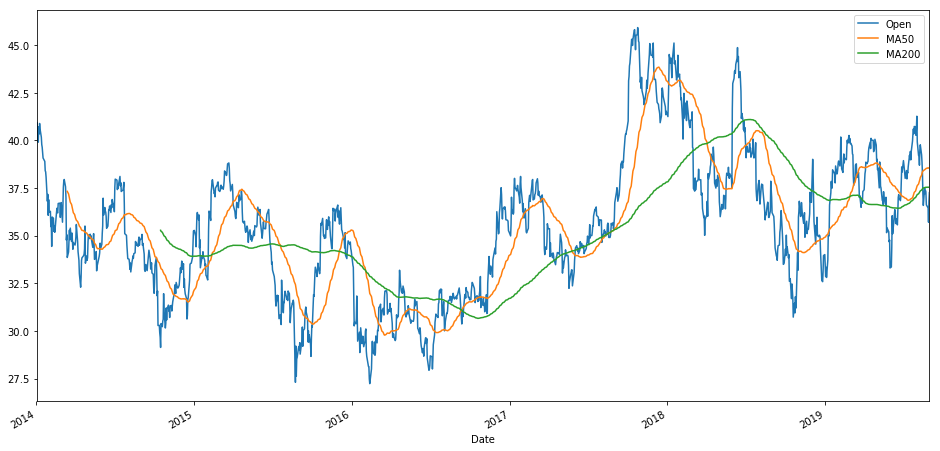

In [24]:
# Moving averages - 
# Helps to identify the trend direction and to determine support and resistance levels. 
# While moving averages are useful enough on their own, they also form the basis for other
# technical indicators such as the moving average convergence divergence (MACD).

Because we have extensive definitions and articles around specific types of moving averages, we will only define the term "moving average" generally here.

gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open', 'MA50', 'MA200']].plot(figsize=(16, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001868B642278>,
      dtype=object)

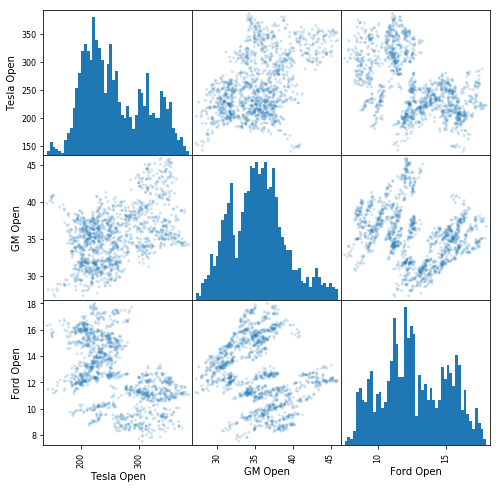

In [28]:
from pandas.plotting import scatter_matrix

car_comp = pd.concat([tesla["Open"], gm['Open'], ford['Open']], axis=1)
car_comp.columns = ['Tesla Open', 'GM Open', 'Ford Open']

scatter_matrix(car_comp, figsize=(8, 8), alpha=0.2, hist_kwds={'bins':50})


In [30]:
# tesla['returns'] = (tesla['Close'] / tesla['Close'].shift(1)) - 1 - Same calc as below
tesla['returns'] = tesla['Close'].pct_change(1)
ford['returns'] = ford['Close'].pct_change(1)
gm['returns'] = gm['Close'].pct_change(1)

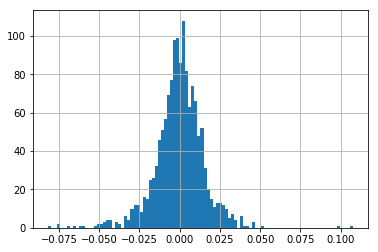

In [31]:
ford['returns'].hist(bins=100)

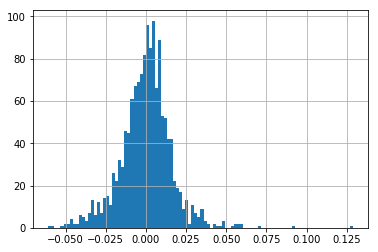

In [33]:
gm['returns'].hist(bins=100)

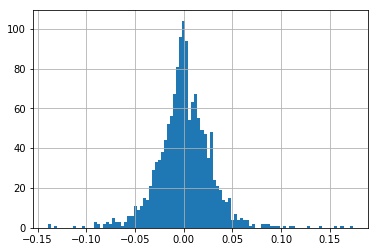

In [34]:
tesla['returns'].hist(bins=100, label='Tesla')

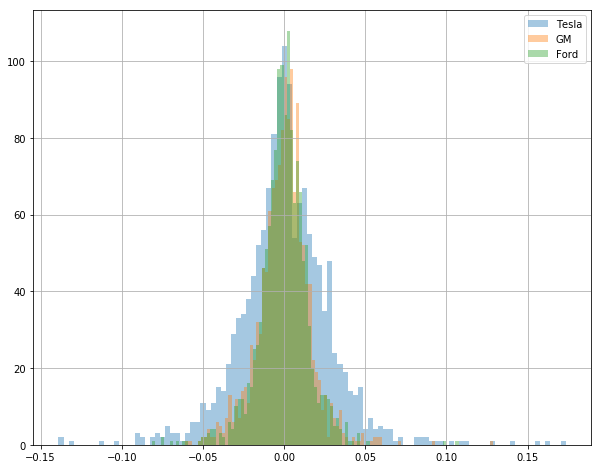

In [36]:
tesla['returns'].hist(bins=100, label='Tesla', figsize=(10, 8), alpha=0.4)
gm['returns'].hist(bins=100, label='GM', figsize=(10, 8), alpha=0.4)
ford['returns'].hist(bins=100, label='Ford', figsize=(10, 8), alpha=0.4)
plt.legend()

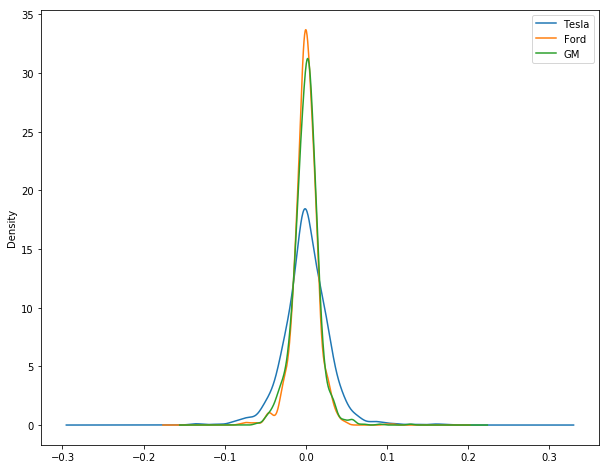

In [37]:
tesla['returns'].plot(kind='kde', label='Tesla', figsize=(10,8))
ford['returns'].plot(kind='kde', label='Ford', figsize=(10,8))
gm['returns'].plot(kind='kde', label='GM', figsize=(10,8))
plt.legend()

In [38]:
# What's the aggregate amount an investment has gained or lost over time, independent of the period of time involved
tesla['Cum Ret'] = (1+tesla['returns']).cumprod()
gm['Cum Ret'] = (1+gm['returns']).cumprod()
ford['Cum Ret'] = (1+ford['returns']).cumprod()

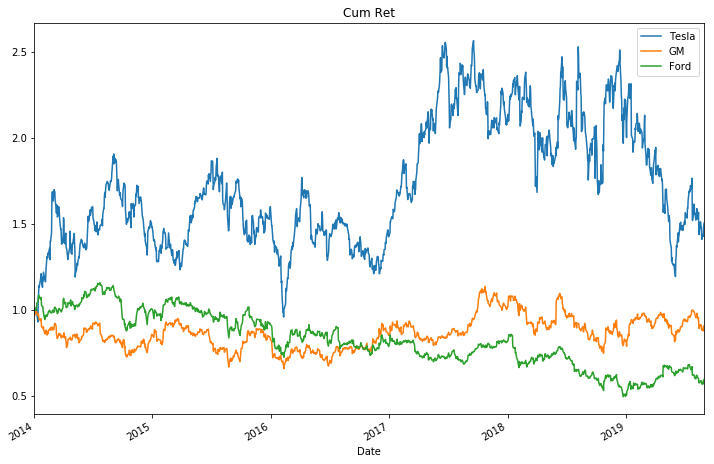

In [52]:
tesla['Cum Ret'].plot(label='Tesla', figsize=(12, 8), title='Cum Ret')
gm['Cum Ret'].plot(label='GM', figsize=(12, 8), title='Cum Ret')
ford['Cum Ret'].plot(label='Ford', figsize=(12, 8), title='Cum Ret')

plt.legend();